# BREAD CANCER DATA ANALYSIS AND PREDICTION

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA

import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import RidgeCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# I-EXPLORE THE DATASET

I-1 IMPORT THE DATA

In [3]:
#TRAINING SET
Xtrain = pd.read_csv("./dataset/xtrain.txt", sep="\t", header=None).T
header = Xtrain.iloc[0]
Xtrain = Xtrain[1:]
Xtrain = Xtrain.rename(columns = header)

#TRAINING LABEL SET
Ytrain = pd.read_csv("./dataset/ytrain.txt", sep="\t", header=None)
#TEST SET
Xtest = pd.read_csv("./dataset/xtest.txt", sep="\t", header=None).T
header1 = Xtest.iloc[0]
Xtest = Xtest[1:]
Xtest = Xtest.rename(columns = header)

#transform the dataframe into array
X_t= np.array(Xtrain)
Y_train= np.array(Ytrain)
X_te= np.array(Xtest)

print(X_t.shape, Y_train.shape, X_te.shape)

(184, 4654) (184, 1) (92, 4654)


I-VISUALIZATION OF THE DATA AND STANDARDIZATION OF THE DATA

In [4]:
#CHECK IF THE DATA ARE BALANCED
N,D = Y_train.shape

label, counts = np.unique(Y_train, return_counts=True)
dictionary = dict(zip(label, counts))

first_pct = dictionary.get(-1)/N
second_pct = dictionary.get(1)/N

print('First Class precentage: %{:2f}'.format(100*first_pct))
print('Second Class precentage: %{:2f}'.format(100*second_pct))

First Class precentage: %64.130435
Second Class precentage: %35.869565


In [ ]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)
 
sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)

In [5]:
# Standardize the dataset, X_train and X_test
sc= MinMaxScaler()
sc.fit(X_t)
X_train=sc.transform(X_t)
 
sc1= MinMaxScaler()
sc1.fit(X_te)
X_test=sc1.transform(X_te)

### Comments

#### We noticed the dataset is unbalanced, hence the Accuracy metrics is not suitable to score our prediction cause it will be unfair with respect to the second class. So we will use f1 score to measure the performance of our model and the ROC CURVE to present our result.

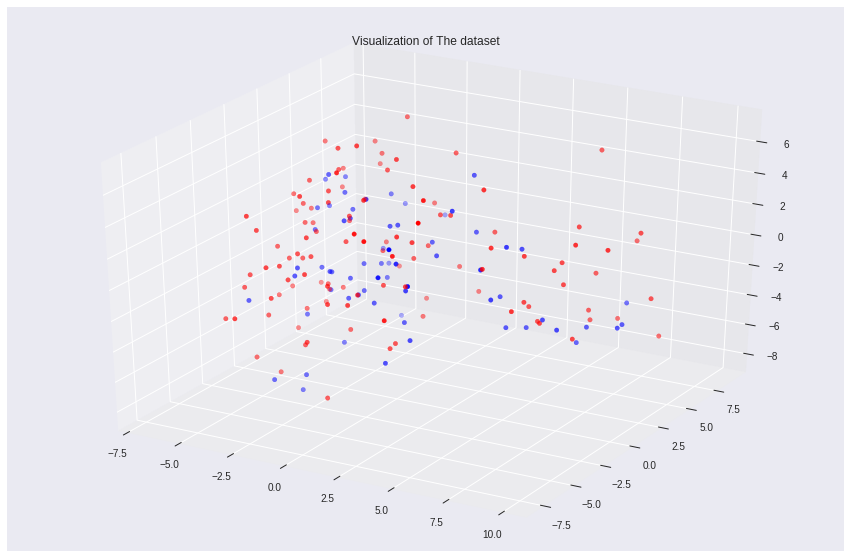

In [6]:
def colors(y):
    colors=[]
    for i in range(y.shape[0]):
        if (y[i]== -1):
            colors.append('red')
        if (y[i]==1):
            colors.append('blue')
    return colors

np.random.seed(0)
kpca = KernelPCA(n_components =3)
X_kpca = kpca.fit_transform(X_train)
fig=plt.figure(figsize=[15,10])
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_kpca[:,0],X_kpca[:,1],X_kpca[:,2],c=colors(Y_train),marker='o')
plt.title("Visualization of The dataset")

plt.show()

I-3 SPLIT THE TRAINING SET INTO TRAIN AND TEST AND THE FONCTION OF PREDICTION ERROR

In [7]:
xtrain,xtest,ytrain,ytest= train_test_split(X_train,Y_train,test_size=0.3)
#Prediction error
def error(ypred, ytrue):
    e = (ypred != ytrue).mean()
    return (e)
def ConfusionmatrixPlot(Ytrue,Ypred):
    
    cm = metrics.confusion_matrix(Ytrue,Ypred)
    from IPython.display import Image, display

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(cm.shape[0]):
         for j in range(cm.shape[1]):
             ax.text(x=j, y=i,
                    s=cm[i, j], 
                    va='center', ha='center')
    plt.xlabel('Predicted Values', )
    plt.ylabel('Actual Values')
    plt.show()
def ROCCURVE(predict,ytrue,ypred):
    fpr,tpr, thresolds=metrics.roc_curve(ytest,predict)
    roc_auc=metrics.auc(fpr,tpr)
    print("the Area under the ROC curve:%f" %roc_auc)

    #plotting the ROC curve
    plt.plot(fpr,tpr,label="AUC = %0.2f" %roc_auc)
    plt.xlabel('false Positive rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristics')

# II-PREDICTION WITH BRUT DATA

II-1 LOGISTIC REGRESSION

In [8]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
Ypred_Logistic = model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),Ypred_Logistic)
parameters = model.coef_

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_Logistic))
print(confusion_matrix(ytest,Ypred_Logistic))
print(classification_report(ytest,Ypred_Logistic))
PredictProbLR=model.predict_proba(xtest)[:,1]


The Acuracy of the model is: 0.5892857142857143
The error of prediction is: 0.41709183673469385
[[28 10]
 [13  5]]
             precision    recall  f1-score   support

         -1       0.68      0.74      0.71        38
          1       0.33      0.28      0.30        18

avg / total       0.57      0.59      0.58        56



the Area under the ROC curve:0.548246


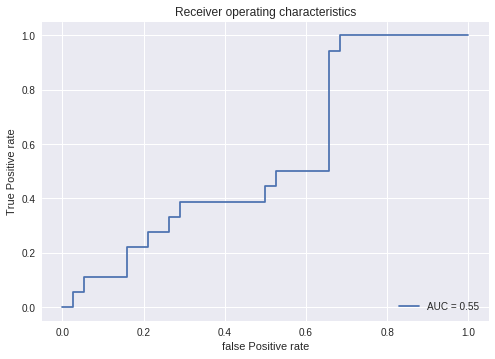

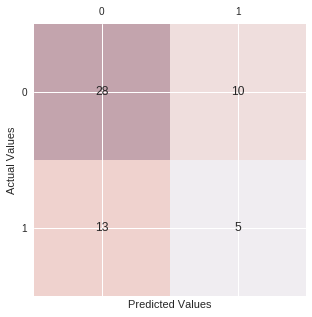

In [9]:
ROCCURVE(PredictProbLR,ytest,Ypred_Logistic)
ConfusionmatrixPlot(ytest, Ypred_Logistic)

II-2 GAUSSIAN PROCESS CLASSIFIER

In [10]:
model = GaussianProcessClassifier()
model.fit(xtrain, ytrain)
Ypred_GPC = model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),Ypred_GPC)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_GPC))
print(confusion_matrix(ytest,Ypred_GPC))
print(classification_report(ytest,Ypred_GPC))
PredictProbLGPC=model.predict_proba(xtest)[:,1]


The Acuracy of the model is: 0.6964285714285714
The error of prediction is: 0.40433673469387754
[[32  6]
 [11  7]]
             precision    recall  f1-score   support

         -1       0.74      0.84      0.79        38
          1       0.54      0.39      0.45        18

avg / total       0.68      0.70      0.68        56



the Area under the ROC curve:0.500000


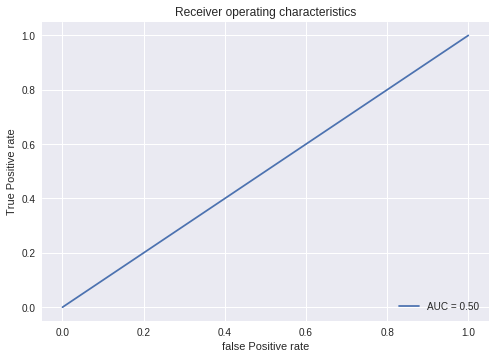

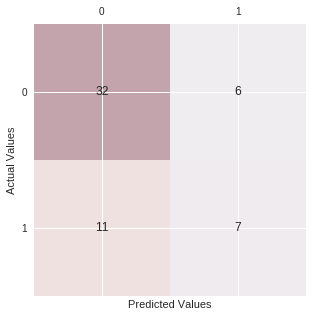

In [11]:
#compute the Area under the ROC Curve
ROCCURVE(PredictProbLGPC,ytest,Ypred_GPC)
ConfusionmatrixPlot(ytest, Ypred_GPC)

II-3 DECISION TREE CLASSIFIER

In [12]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
Ypred_DTC = model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),Ypred_DTC)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_DTC))
print(confusion_matrix(ytest,Ypred_DTC))
print(classification_report(ytest,Ypred_DTC))
PredictProbLDTC=model.predict_proba(xtest)[:,1]

The Acuracy of the model is: 0.5178571428571429
The error of prediction is: 0.44260204081632654
[[24 14]
 [13  5]]
             precision    recall  f1-score   support

         -1       0.65      0.63      0.64        38
          1       0.26      0.28      0.27        18

avg / total       0.52      0.52      0.52        56



the Area under the ROC curve:0.454678


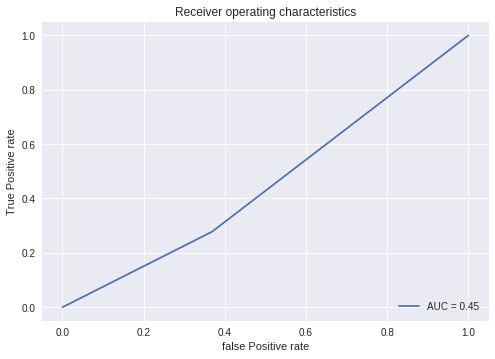

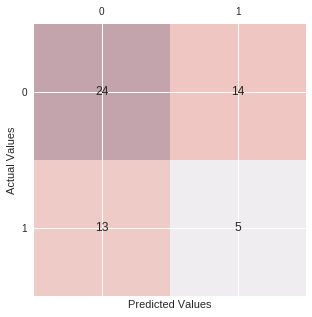

In [13]:
ROCCURVE(PredictProbLDTC,ytest,Ypred_DTC)
ConfusionmatrixPlot(ytest, Ypred_DTC)

II-4 KNN CLASSIFIER

In [14]:
model = KNeighborsClassifier()
model.fit(xtrain, ytrain)
Ypred_KNN= model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),Ypred_KNN)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_KNN))
print(confusion_matrix(ytest,Ypred_KNN))
print(classification_report(ytest,Ypred_KNN))

The Acuracy of the model is: 0.6964285714285714
The error of prediction is: 0.3405612244897959
[[37  1]
 [16  2]]
             precision    recall  f1-score   support

         -1       0.70      0.97      0.81        38
          1       0.67      0.11      0.19        18

avg / total       0.69      0.70      0.61        56



the Area under the ROC curve:0.559211


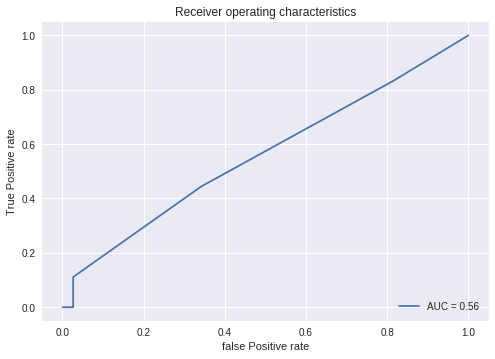

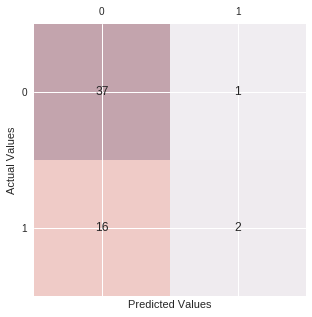

In [15]:
#compute the Area under the ROC Curve
PredictProbLKNN=model.predict_proba(xtest)[:,1]
ROCCURVE(PredictProbLKNN,ytest,Ypred_KNN)
ConfusionmatrixPlot(ytest, Ypred_KNN)

II-5 LDA ANALYSIS

In [16]:
model = LinearDiscriminantAnalysis()
model.fit(xtrain, ytrain)
Ypred_LDA= model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),Ypred_LDA)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_LDA))
print(confusion_matrix(ytest,Ypred_LDA))
print(classification_report(ytest,Ypred_LDA))


The Acuracy of the model is: 0.5892857142857143
The error of prediction is: 0.40433673469387754
[[29  9]
 [14  4]]
             precision    recall  f1-score   support

         -1       0.67      0.76      0.72        38
          1       0.31      0.22      0.26        18

avg / total       0.56      0.59      0.57        56



the Area under the ROC curve:0.543860


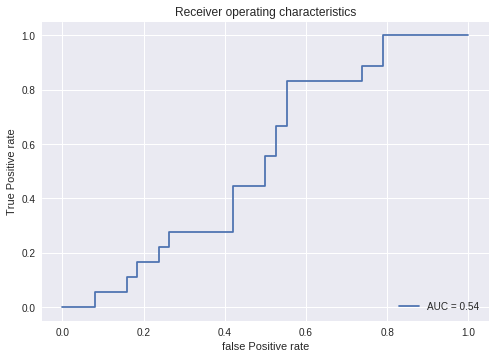

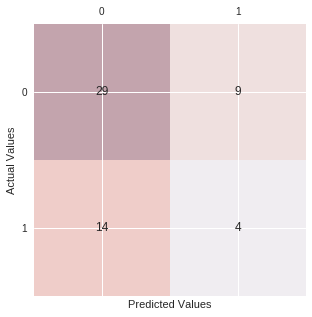

In [17]:
#compute the Area under the ROC Curve
PredictProbLDA=model.predict_proba(xtest)[:,1]
ROCCURVE(PredictProbLDA,ytest,Ypred_LDA)
ConfusionmatrixPlot(ytest, Ypred_LDA)

II-6 GAUSSIAN NAIVE BAYE

In [18]:
model = GaussianNB()
model.fit(xtrain, ytrain)
Ypred_GNB= model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),Ypred_GNB)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_GNB))
print(confusion_matrix(ytest,Ypred_GNB))
print(classification_report(ytest,Ypred_GNB))

The Acuracy of the model is: 0.5535714285714286
The error of prediction is: 0.48086734693877553
[[22 16]
 [ 9  9]]
             precision    recall  f1-score   support

         -1       0.71      0.58      0.64        38
          1       0.36      0.50      0.42        18

avg / total       0.60      0.55      0.57        56



the Area under the ROC curve:0.586257


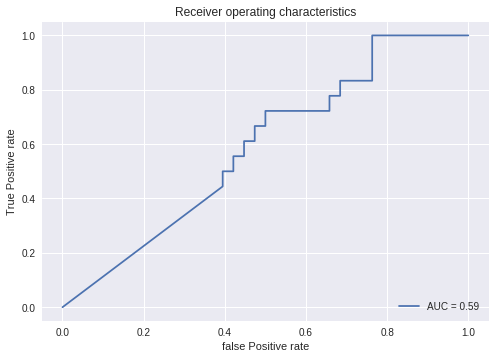

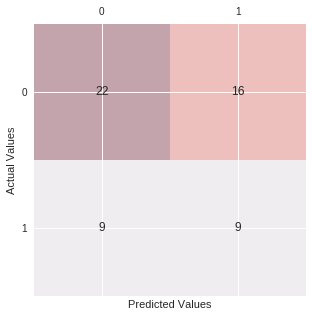

In [19]:
#compute the Area under the ROC Curve
PredictProbLGNB=model.predict_proba(xtest)[:,1]
ROCCURVE(PredictProbLGNB,ytest,Ypred_GNB)
ConfusionmatrixPlot(ytest, Ypred_GNB)

II-7 RANDOM FOREST CLASSIFIER

In [20]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
Ypred_RFC=model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),Ypred_RFC)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_RFC))
print(confusion_matrix(ytest,Ypred_RFC))
print(classification_report(ytest,Ypred_RFC))

The Acuracy of the model is: 0.625
The error of prediction is: 0.36607142857142855
[[33  5]
 [16  2]]
             precision    recall  f1-score   support

         -1       0.67      0.87      0.76        38
          1       0.29      0.11      0.16        18

avg / total       0.55      0.62      0.57        56



the Area under the ROC curve:0.707602


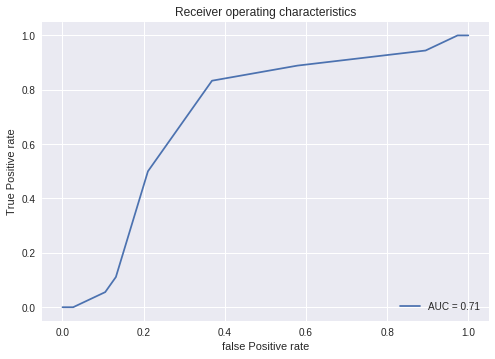

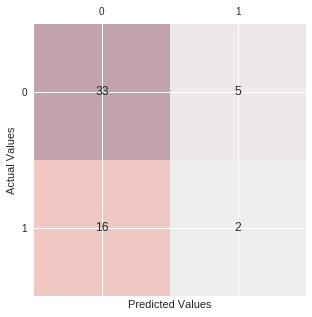

In [21]:
#compute the Area under the ROC Curve
PredictProbLRFC=model.predict_proba(xtest)[:,1]
ROCCURVE(PredictProbLRFC,ytest,Ypred_RFC)
ConfusionmatrixPlot(ytest, Ypred_RFC)

II-8 KERNEL LOGISTIC REGRESSION

In [22]:
model = KernelRidge()
model.fit(xtrain, ytrain)
Prob=model.predict(xtest)
N,D= Prob.shape
Ypred_KRR= np.ones(N)
#print(Prob.shape, Ypred_KRR.shape)
for i in range(N):
    if(Prob[i,0]<0):
       
        Ypred_KRR[i,]=-1
    else:
        Ypred_KRR[i,]=1
accuracy = accuracy_score(ytest.flatten(),Ypred_KRR)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_KRR))
print(confusion_matrix(ytest,Ypred_KRR))
print(classification_report(ytest,Ypred_KRR))

The Acuracy of the model is: 0.5714285714285714
The error of prediction is: 0.42346938775510207
[[27 11]
 [13  5]]
             precision    recall  f1-score   support

         -1       0.68      0.71      0.69        38
          1       0.31      0.28      0.29        18

avg / total       0.56      0.57      0.56        56



the Area under the ROC curve:0.540936


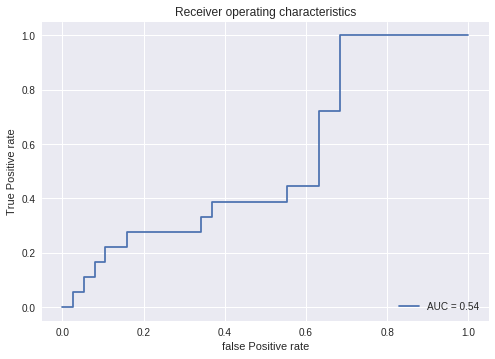

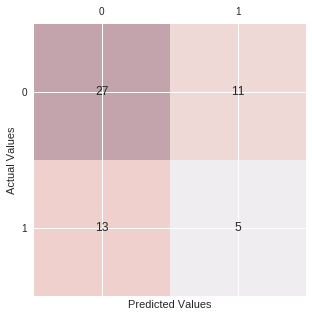

In [23]:
ROCCURVE(Prob,ytest,Ypred_KRR)
ConfusionmatrixPlot(ytest,Ypred_KRR)

# II-9 LINEAR SVM


In [24]:
model = LinearSVC(penalty='l2',loss='hinge',C=0.1)
model.fit(xtrain, ytrain)
Ypred_LSVC=model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),Ypred_LSVC)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_LSVC))
print(confusion_matrix(ytest,Ypred_LSVC))
print(classification_report(ytest,Ypred_LSVC))

The Acuracy of the model is: 0.5892857142857143
The error of prediction is: 0.41709183673469385
[[28 10]
 [13  5]]
             precision    recall  f1-score   support

         -1       0.68      0.74      0.71        38
          1       0.33      0.28      0.30        18

avg / total       0.57      0.59      0.58        56



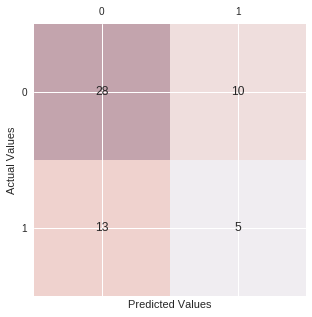

In [25]:
#compute the Area under the ROC Curve
#PredictProbLSVM=model.predict_proba(xtest)[:,1]
#ROCCURVE(PredictProbLSVM,ytest,Ypred_LSVC)
ConfusionmatrixPlot(ytest, Ypred_LSVC)

II-10 NON LINEAR SVM WITH RBF KERNEL

In [26]:
model = SVC(kernel='rbf')
model.fit(xtrain, ytrain)
Ypred_SVCRBF=model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),Ypred_SVCRBF)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_SVCRBF))
print(confusion_matrix(ytest,Ypred_SVCRBF))
print(classification_report(ytest,Ypred_SVCRBF))

The Acuracy of the model is: 0.6785714285714286
The error of prediction is: 0.32142857142857145
[[38  0]
 [18  0]]
             precision    recall  f1-score   support

         -1       0.68      1.00      0.81        38
          1       0.00      0.00      0.00        18

avg / total       0.46      0.68      0.55        56



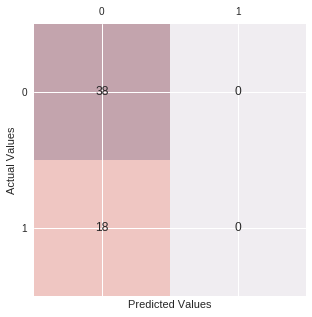

In [27]:
#PredictProbRBF=model.predict_proba(xtest)[:,1]
#ROCCURVE(PredictProbRBF,ytest,Ypred_SVCRBF)
ConfusionmatrixPlot(ytest,Ypred_SVCRBF)

II-11 NON LINEAR SVM WITH LINEAR KERNEL

In [28]:
model = SVC(kernel='linear')
model.fit(xtrain, ytrain)
Ypred_SVCLIN=model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),Ypred_SVCLIN)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_SVCLIN))
print(confusion_matrix(ytest,Ypred_SVCLIN))
print(classification_report(ytest,Ypred_SVCLIN))

The Acuracy of the model is: 0.5892857142857143
The error of prediction is: 0.41709183673469385
[[28 10]
 [13  5]]
             precision    recall  f1-score   support

         -1       0.68      0.74      0.71        38
          1       0.33      0.28      0.30        18

avg / total       0.57      0.59      0.58        56



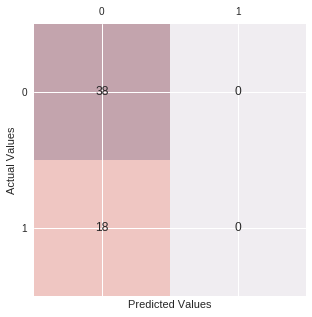

In [29]:
#PredictProbLSSM=model.predict_proba(xtest)[:,1]
#ROCCURVE(PredictProbLSSM,ytest,Ypred_SVCLIN)
ConfusionmatrixPlot(ytest,Ypred_SVCRBF)

II-12 NON LINEAR SVM WITH POLYNOMIAL KERNEL

In [30]:
model = SVC(kernel='poly')
model.fit(xtrain, ytrain)
Ypred_SVCPOLY=model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),Ypred_SVCPOLY)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_SVCPOLY))
print(confusion_matrix(ytest,Ypred_SVCPOLY))
print(classification_report(ytest,Ypred_SVCPOLY))

The Acuracy of the model is: 0.6785714285714286
The error of prediction is: 0.32142857142857145
[[38  0]
 [18  0]]
             precision    recall  f1-score   support

         -1       0.68      1.00      0.81        38
          1       0.00      0.00      0.00        18

avg / total       0.46      0.68      0.55        56



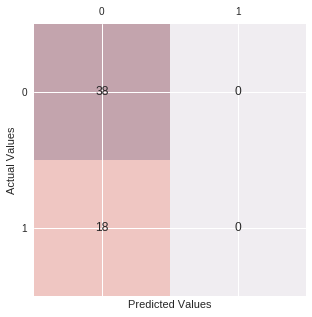

In [31]:
#PredictProbLPOL=model.predict_proba(xtest)[:,1]
#ROCCURVE(PredictProbLPOL,ytest,Ypred_SVCPOLY)
ConfusionmatrixPlot(ytest,Ypred_SVCPOLY)

II-13 NON LINEAR SVM WITH SIGMOID KERNEL

In [32]:
model = SVC(kernel='sigmoid')
model.fit(xtrain, ytrain)
Ypred_SVCSIG=model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),Ypred_SVCSIG)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_SVCSIG))
print(confusion_matrix(ytest,Ypred_SVCSIG))
print(classification_report(ytest,Ypred_SVCSIG))

The Acuracy of the model is: 0.6785714285714286
The error of prediction is: 0.32142857142857145
[[38  0]
 [18  0]]
             precision    recall  f1-score   support

         -1       0.68      1.00      0.81        38
          1       0.00      0.00      0.00        18

avg / total       0.46      0.68      0.55        56



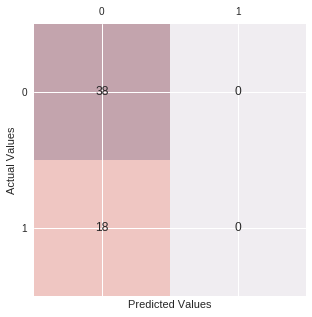

In [33]:
#PredictProbLSIG=model.predict_proba(xtest)[:,1]
#ROCCURVE(PredictProbLSIG,ytest,Ypred_SVCSIG)
ConfusionmatrixPlot(ytest,Ypred_SVCSIG)

# III- CROSS VALIDATION (MODEL SELECTION)

LR: 0.609357 (0.090805)
GPC: 0.593275 (0.089699)
DTC: 0.623977 (0.142198)
KNN: 0.621053 (0.152520)
LDA: 0.636842 (0.124445)
GNB: 0.565205 (0.073077)
RFC: 0.620760 (0.132885)
LSVM: 0.559942 (0.091332)
RBFK: 0.642982 (0.158858)
PLOKYK: 0.642982 (0.158858)
SIGK: 0.642982 (0.158858)


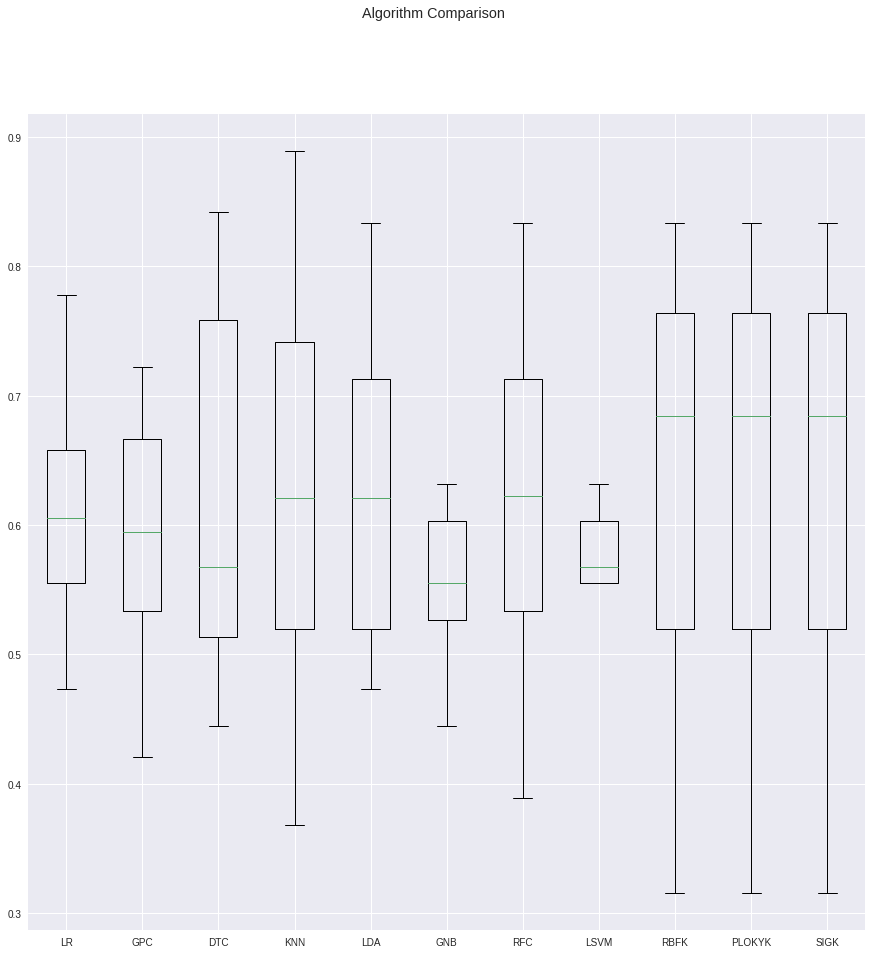

In [34]:
# prepare configuration for cross validation test harness
seed = 100
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('GPC', GaussianProcessClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(n_estimators=14)))
#models.append(('KRR', KernelRidge()))
models.append(('LSVM',LinearSVC()))
models.append(('RBFK',SVC(kernel='rbf')))
models.append(('PLOKYK',SVC(kernel='poly')))
models.append(('SIGK',SVC(kernel='sigmoid')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=[15,15])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [35]:
# Cross validation for kernel ridge regression
alpha= 10**np.linspace(-3,10,100)
model = RidgeCV(alphas=alpha).fit(xtrain, ytrain)
Prob=model.predict(xtest)
N,D= Prob.shape
Ypred_CVKRR= np.ones(N)
for i in range(N):
    if(Prob[i,0]<0):
       
        Ypred_CVKRR[i,]=-1
    else:
        Ypred_CVKRR[i,]=1
accuracy = accuracy_score(ytest.flatten(),Ypred_CVKRR)

print("The Acuracy of the model is:",accuracy)
print("The error of prediction is:", error(ytest,Ypred_CVKRR))
print(confusion_matrix(ytest,Ypred_CVKRR))
print(classification_report(ytest,Ypred_CVKRR))



The Acuracy of the model is: 0.5714285714285714
The error of prediction is: 0.42346938775510207
[[27 11]
 [13  5]]
             precision    recall  f1-score   support

         -1       0.68      0.71      0.69        38
          1       0.31      0.28      0.29        18

avg / total       0.56      0.57      0.56        56



the Area under the ROC curve:0.542398


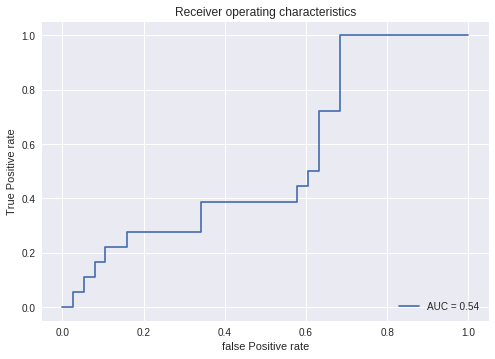

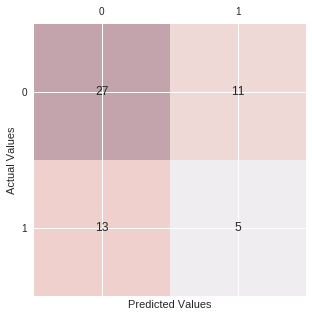

In [36]:
ROCCURVE(Prob,ytest,Ypred_CVKRR)
ConfusionmatrixPlot(ytest,Ypred_CVKRR)